# Funções de Autocovariância e Autocorrelação

por **Cibele Russo**

Baseado em 

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras sugeridas:

- https://en.wikipedia.org/wiki/Autocorrelation

- https://otexts.com/fpp2/autocorrelation.html

- https://www.statsmodels.org/devel/generated/statsmodels.graphics.tsaplots.plot_pacf.html

- https://en.wikipedia.org/wiki/Partial_autocorrelation_function


Logo falaremos de modelos autorregressivos, mas antes disso precisamos estudar covariância, correlação e como elas são usadas para descrever a associação entre observações de uma série temporal observada.

Nesta aula, falaremos de 

- Função de autocovariância

- Função de autocorrelação

- Gráficos de autocorrelação e autocorrelação parcial



<span style="color:red">**Antes de falar de autocovariância e autocorrelação, o que é covariância e correlação?**</span>



Basicamente, a **covariância é uma medida de variabilidade conjunta entre duas variáveis aleatórias**.

Ela mede a força da associação linear entre essas duas variáveis. 

E a **correlação é essa medida de associação linear padronizada**, de forma que assuma valores entre -1 e 1.

O sinal da covariância e da correlação indica se as variáveis se associam de forma positiva ou negativa.




## Covariância e correlação

A covariância entre duas variáveis aleatórias  $X$ e $Y$ é dada por

$\sigma^2_{XY}=Cov(X,Y) = E[(X-E(X))(Y-E(Y))]$

Sejam $\sigma^2_X$ e  $\sigma^2_Y$ as variâncias de $X$ e $Y$, respectivamente.

A correlação entre  $X$ e $Y$ é dada por

$\rho = Cor(X,Y) = \displaystyle\frac{ E[(X-E(X))(Y-E(Y))]}{\sqrt{Var(X)}\sqrt{(Var(Y))}} = \displaystyle\frac{\sigma^2_{XY}}{\sqrt{\sigma^2_X} \sqrt{\sigma^2_Y}}$

Obs: $-1\leq\rho\leq 1$ e quanto maior a correlação em módulo, mais forte é a associação, positiva ou negativa, entre as duas variáveis.



### Coeficiente de correlação de Pearson

O coeficiente de correlação de Pearson entre as variáveis aleatórias $X$ e $Y$, dada que amostras de $X$ e $Y$ foram observadas, é dado por

${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$


Em Python, podemos usar a função numpy.corrcoef(x,y)



<span style="color:red">**Correlação não significa causalidade!**</span>

<span style="color:red">**E então que é autocovariância e autocorrelação?**</span>

## Autocovariância
 
Seja $\{Z_t, t\in \mathbb{Z}\}$ um processo estacionário real com tempo discreto, de média zero.

A função de autocovariância facv para um deslocamento no tempo $\tau$ é dada por $\gamma_\tau = E(Z_t Z_{t+\tau})$.

Mais geralmente, a **função de autocovariância** é dada por:

$\gamma(\tau) = E[(Z(t)-\mu)(Z (t+\tau )-\mu)] = Cov(Z (t), Z (t + \tau )).$

$\gamma(\tau)$ é chamado de coeficiente de autocovariância na defasagem $\tau$.


## Autocorrelação

Uma quantidade livre de escala é a **função de autocorrelação**

$\rho(\tau) = \displaystyle\frac{\gamma(\tau)}{\gamma(0)}, \mbox{ para } \tau \in \mathbb{Z}.$






 
A autocorrelação, também conhecida como correlação serial, é a correlação de um sinal com uma cópia atrasada de si mesma em função do atraso (lag). Informalmente, é a semelhança entre as observações em função do intervalo de tempo entre elas.

(Fonte: Traduzido de https://en.wikipedia.org/wiki/Autocorrelation)


Para entender a autocorrelação, é comum construirmos gráficos e autocorrelação e autocorrelação parcial.

## Autocorrelação em séries temporais

Seja $y_k$ a $k$-ésima observação da série temporal, e $\bar{y}$ e média amostral da série.

A autocorrelação entre observações com atraso $k$ é dada por

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$




## Correlograma

O correlograma é uma representação das autocorrelações entre as observações da série temporal.

Ou seja, cada ponto do gráfico representa a correlação entre a série original e a série com o atraso correspondente.

## Autocorrelação parcial

A autocorrelação parcial é uma medida de associação linear de duas variáveis após remover o efeito de outras variáveis que afetam ambas. Ou seja, a autocorrelação parcial com atraso $k$ é a autocorrelação entre $y_t$ e $y_ {t + k}$ em que não são contabilizados os atrasos entre $1$ e $k - 1$.

Na prática, modelos lineares são ajustados para a série "corrente" com a série em atraso como preditor, e os resíduos desse modelo são utilizados para o próximo passo, calcula-se a correlação entre os resíduos e a próxima série em atraso e assim por diante.





## Aplicações

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm


# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


# Dados Passageiros aéreos
df1 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv',index_col=0,parse_dates=True)
df1.index.freq = 'MS'

# Dados de nascimentos diários de mulheres
df2 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


In [2]:
# Funções para cálculo da autocorrelação e autocorrelação parcial

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

## Funções para cálculo de autocorrelação e autocorrelação parcial

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html

In [3]:
acf(df1['Milhares de passageiros'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [4]:
pacf(df1['Milhares de passageiros'])

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

In [5]:
pacf(df1['Milhares de passageiros'], method='ols')

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883])

In [6]:
pacf_ols(df1['Milhares de passageiros'])

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883])

In [7]:
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

In [8]:
pacf(df2['Births'], method='ols')

array([ 1.        ,  0.2179641 ,  0.11388341,  0.06139271,  0.05014092,
        0.05597304,  0.0483302 ,  0.16061715,  0.061602  , -0.0245556 ,
       -0.00774957,  0.00782231, -0.07054357,  0.00367697,  0.05073901,
        0.06869818,  0.02855912, -0.03000743,  0.04890835,  0.05079005,
        0.06672663,  0.23464568,  0.01251561, -0.05701977,  0.03051524,
       -0.03035958])

# Representação gráfica da autocorrelação


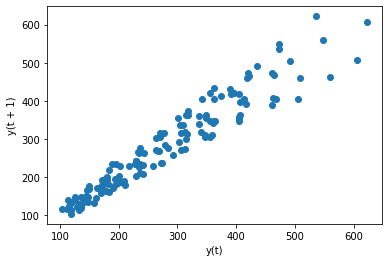

In [9]:
from pandas.plotting import lag_plot

lag_plot(df1['Milhares de passageiros']);

O gráfico acima indica forte correlação entre a série original e a série com atraso 1.

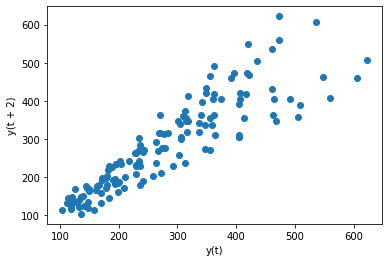

In [10]:
from pandas.plotting import lag_plot

lag_plot(df1['Milhares de passageiros'],lag=2);

**Dados dos nascimentos**

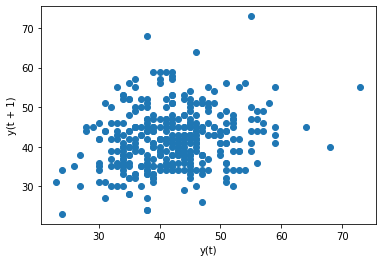

In [11]:
lag_plot(df2['Births']);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

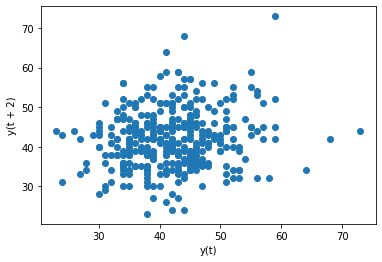

In [12]:
lag_plot(df2['Births'], lag=2)

## Representação gráfica da autocorrelação



In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

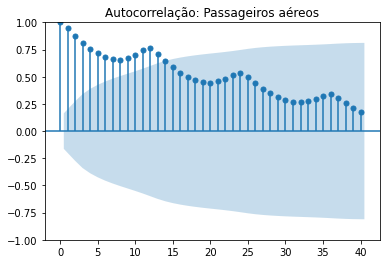

In [14]:
title = 'Autocorrelação: Passageiros aéreos'
lags = 40
plot_acf(df1['Milhares de passageiros'],title=title,lags=lags);


Observe o efeito da sazonalidade e portanto da não-estacionariedade no gráfico da autocorrelação.

A região em azul representa um intervalo de confiança para a correlação, e quando um ponto ultrapassa essa região temos um indicativo de significância da correlação observada.


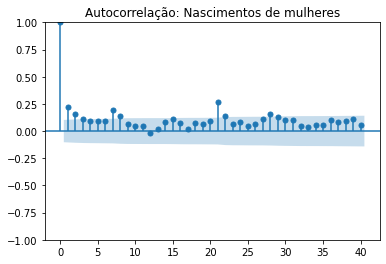

In [15]:
title='Autocorrelação: Nascimentos de mulheres'
lags=40
plot_acf(df2['Births'],title=title,lags=lags);

## Representação gráfica da autocorrelação parcial

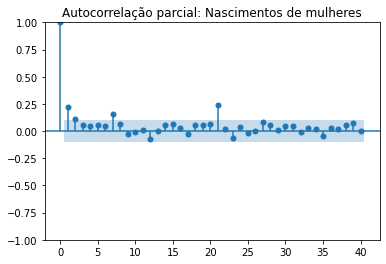

In [16]:
title='Autocorrelação parcial: Nascimentos de mulheres'
lags=40
plot_pacf(df2['Births'],title=title,lags=lags);

**Exercícios:**
    
Obtenha gráficos de autocorrelação e autocorrelação parcial para os dados de COVID-19 do estado de São Paulo. Lembre-se de utilizar os dados completos como fizemos na Aula 2.

Obtenha gráficos de autocorrelação e autocorrelação parcial para os dados PETR4.
    